In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing Mushroom csv file

In [17]:
Mushroomdf = pd.read_csv('Mushroom Project.csv')
Mushroomdf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [18]:
Mushroomdf.shape

(8124, 23)

In [19]:
Mushroomdf.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [20]:
Mushroomdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [21]:
Mushroomdf.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [22]:
# We have to check null value

Mushroomdf.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [23]:
Mushroomdf.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [24]:
Mushroomdf['class'].unique()

array(['p', 'e'], dtype=object)

There are two unique value present in target value

In [25]:
Mushroomdf['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

# Checking class imbalance

<AxesSubplot:xlabel='class', ylabel='count'>

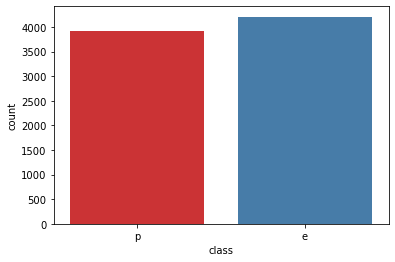

In [26]:
sns.countplot(Mushroomdf['class'],palette = 'Set1')

there is no substantial imbalance in data distrubution between the 2 class so, there is no issue.

# Finding Correlation

In [27]:
# Label Encoder

LabelEn = LabelEncoder()

In [28]:
for col in Mushroomdf:
    Mushroomdf[col] = LabelEn.fit_transform(Mushroomdf[col])

In [29]:
Mushroomdf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


All class have been encoded using Label Encoder

In [30]:
Mushroomdf.nunique()

class                        2
cap-shape                    6
cap-surface                  4
cap-color                   10
bruises                      2
odor                         9
gill-attachment              2
gill-spacing                 2
gill-size                    2
gill-color                  12
stalk-shape                  2
stalk-root                   5
stalk-surface-above-ring     4
stalk-surface-below-ring     4
stalk-color-above-ring       9
stalk-color-below-ring       9
veil-type                    1
veil-color                   4
ring-number                  3
ring-type                    5
spore-print-color            9
population                   6
habitat                      7
dtype: int64

In [31]:
# Finding Correlation

mush_corr = Mushroomdf.corr()
mush_corr.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.298801,-0.154003,-0.146730,NaN,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.032591,-0.031659,-0.030390,NaN,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.107965,0.066050,0.068885,NaN,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.047710,0.002364,0.008057,NaN,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.458983,0.083538,0.092874,NaN,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095


In [32]:
# Dropping veil-type column

Mushroomdf.drop(['veil-type'],axis = 1, inplace = True)
Mushroomdf.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [33]:
Mushroomdf.shape

(8124, 22)

In [34]:
mush_corr = Mushroomdf.corr()

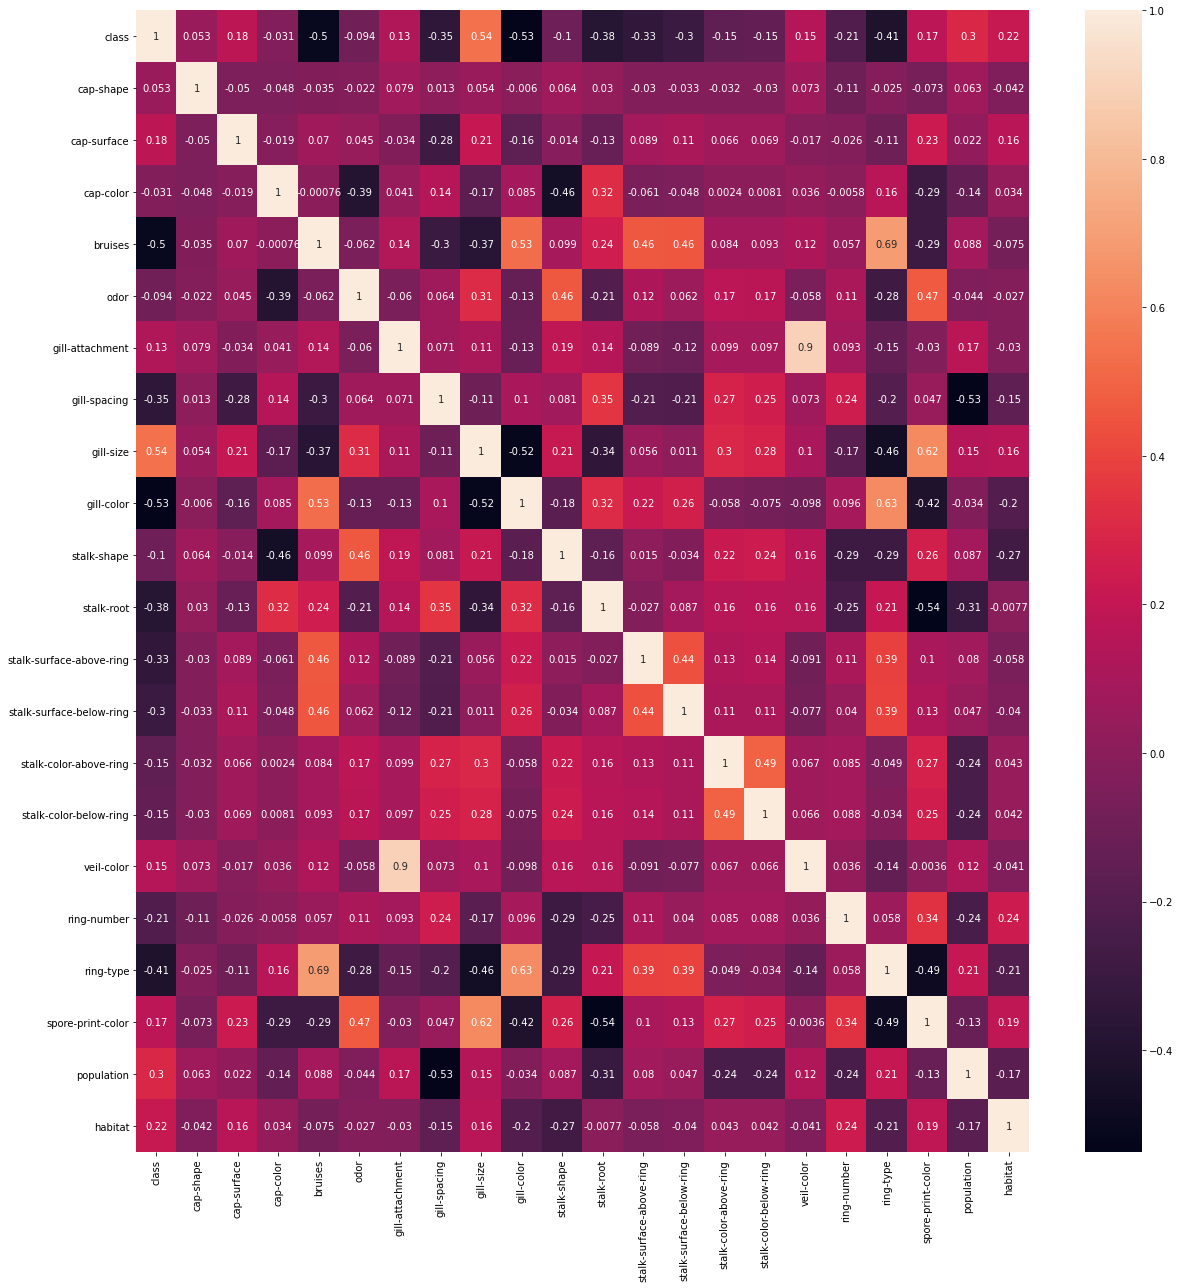

In [35]:
plt.figure(figsize=(20,21))
sns.heatmap(mush_corr,annot = True)
plt.show()

# checking relations between independent and dependent class

In [36]:
x = Mushroomdf.drop(columns = ['class'])
y = Mushroomdf['class']

In [37]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

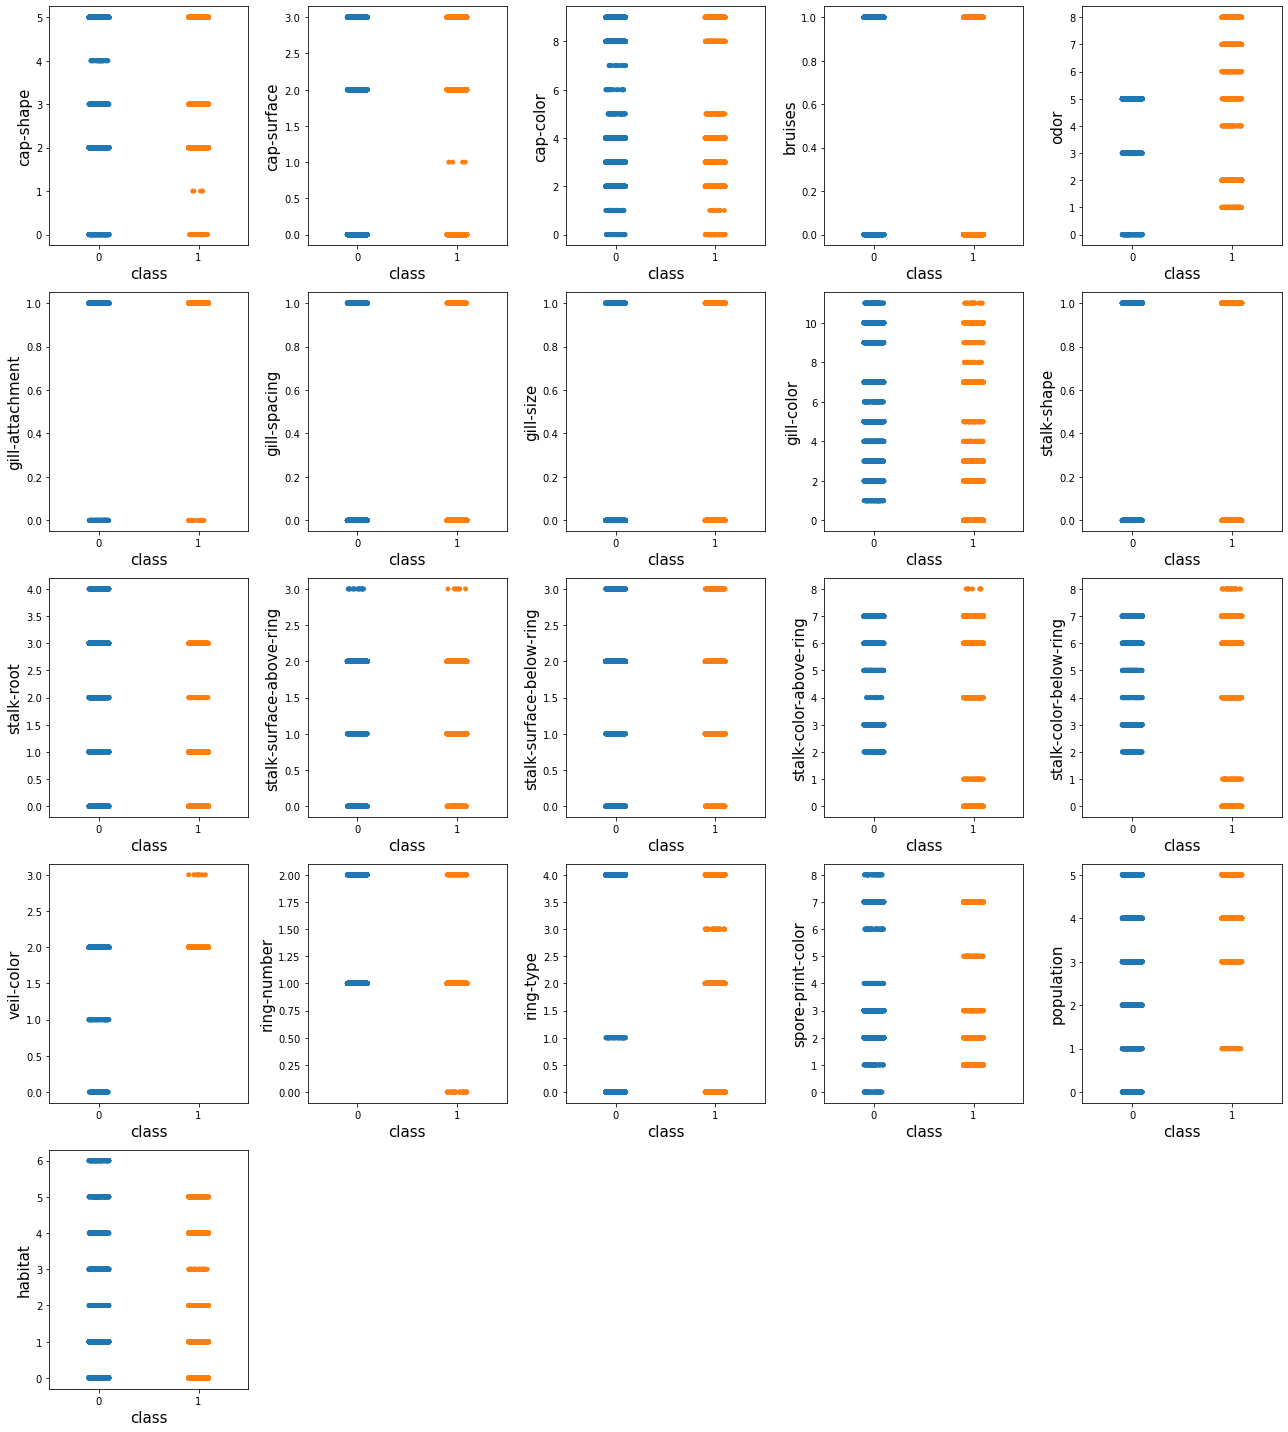

In [38]:
plt.figure(figsize = (18,20), facecolor = 'white')
plotnum = 1

for col in x:
    if plotnum<=23:
        plt.subplot(5,5,plotnum)
        sns.stripplot(y,x[col])
        plt.xlabel('class',fontsize = 15)
        plt.ylabel(col,fontsize = 15)
    plotnum+=1
plt.tight_layout()

# Selected KBest Feature

In [39]:
from sklearn.feature_selection import SelectKBest, f_classif

In [40]:
bestfeat = SelectKBest(score_func = f_classif, k = 21)
fit = bestfeat.fit(x,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [41]:
fit = bestfeat.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfcolumns.head()
featureScore = pd.concat([dfcolumns,dfscores],axis = 1)
featureScore.columns = ['Feature', 'Score']
print(featureScore.nlargest(21,'Score'))

                     Feature        Score
7                  gill-size  3343.700439
8                 gill-color  3182.110596
3                    bruises  2729.510254
17                 ring-type  1658.307007
10                stalk-root  1365.373901
6               gill-spacing  1121.971924
11  stalk-surface-above-ring  1023.906250
12  stalk-surface-below-ring   796.237427
19                population   795.558777
20                   habitat   402.052460
16               ring-number   391.206696
1                cap-surface   267.136200
18         spore-print-color   247.489716
13    stalk-color-above-ring   197.297867
14    stalk-color-below-ring   178.710388
15                veil-color   174.766830
5            gill-attachment   137.887238
9                stalk-shape    85.421318
4                       odor    71.713234
0                  cap-shape    22.838203
2                  cap-color     8.008406


In [42]:
# selecting best feature

xbest = x.drop(columns = ['cap-color','cap-shape'])
xbest.shape

(8124, 19)

# Model Building of Classification

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [44]:
RFC = RandomForestClassifier()
DTC = DecisionTreeClassifier()
LGR = LogisticRegression(solver = 'liblinear')
XGBC = XGBClassifier()
SV = SVC()

# Training the Model

In [46]:
x_train,x_test,y_train,y_test = train_test_split(xbest,y,test_size = .30, random_state = 1)

In [53]:
RFC.fit(x_train,y_train)
DTC.fit(x_train,y_train)
LGR.fit(x_train,y_train)
XGBC.fit(x_train,y_train)
SV.fit(x_train,y_train)

[10:27:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


SVC()

# RandomForest Model

In [48]:
RFCprediction = RFC.predict(x_test)
accu = classification_report(y_test,RFCprediction)
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# DicisionTree Model

In [49]:
DTCprediction = DTC.predict(x_test)
accu = classification_report(y_test,DTCprediction)
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# Logic Regression Model

In [50]:
LGRprediction = LGR.predict(x_test)
accu = classification_report(y_test,LGRprediction)
print(accu)

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1236
           1       0.96      0.93      0.95      1202

    accuracy                           0.95      2438
   macro avg       0.95      0.95      0.95      2438
weighted avg       0.95      0.95      0.95      2438



# XGB Classifier Model

In [52]:
XGBCprediction = XGBC.predict(x_test)
accu = classification_report(y_test,XGBCprediction)
print(accu)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1236
           1       1.00      1.00      1.00      1202

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



# SV Classifier Model

In [54]:
SVprediction = SV.predict(x_test)
accu = classification_report(y_test,SVprediction)
print(accu)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1236
           1       1.00      0.98      0.99      1202

    accuracy                           0.99      2438
   macro avg       0.99      0.99      0.99      2438
weighted avg       0.99      0.99      0.99      2438



# Cross Validation

In [55]:
from sklearn.model_selection import cross_val_score as cv

# RandomForest Classifier

In [57]:
print(cv(RFC,xbest,y,cv=5).mean())

0.8975563471011746


# Dicision Tree Classifier

In [58]:
print(cv(DTC,xbest,y,cv=5).mean())

0.9596253126184161


# Logic Regression Model

In [59]:
print(cv(LGR,xbest,y,cv=5).mean())

0.8410736642667678


# XGB Classifier Model

In [60]:
print(cv(XGBC,xbest,y,cv=5).mean())

[10:35:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[10:35:56] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

# SV Model

In [61]:
print(cv(SV,xbest,y,cv=5).mean())

0.8311999242137172


Decission Tree Model is the best model

# HyperParameter Tuning

In [62]:
from sklearn.model_selection import GridSearchCV

In [63]:
parameter = {'max_depth': np.arange(2,500),'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"]}

In [65]:
GridSCV = GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [67]:
GridSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([  2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,
        41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
        54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,
        67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  81,  82,...
       418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430,
       431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443,
       444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456,
       457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,
       470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 482,
       483, 484, 485, 486, 487,

In [68]:
GridSCV.best_params_

{'criterion': 'gini', 'max_depth': 11, 'max_features': 'auto'}

In [73]:
A_Model = DecisionTreeClassifier(criterion = 'gini', max_depth = 12, max_features= 'log2')

In [74]:
A_Model.fit(x_train,y_train)
pred = A_Model.predict(x_test)
accu = accuracy_score(y_test,pred)
print(accu*100)

100.0


# Saving the model

In [75]:
import joblib
joblib.dump(A_Model,"A_Model_Mushroom.pkl")

['A_Model_Mushroom.pkl']

In [76]:
model = joblib.load("A_Model_Mushroom.pkl")

In [77]:
print(model.predict(x_test))

[0 1 1 ... 1 0 1]
